In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt 

### JASMIN Servers

In [2]:
# import sys
# sys.path.append('/home/users/cturrell/documents/eddy_feedback/') 
# import functions.eddy_feedback as ef 
# import functions.data_wrangling as data 


# ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/jra55_TEM_ubar_div1.nc',
#                             parallel=True, chunks={'time': 31})

# ds = ds.sel(time=slice('1958-03', '2016-11'))
# ds = ds.sel(latitude=slice(25,72))
# ds 

### Maths Servers

In [3]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/') 
import functions.eddy_feedback as ef 
import functions.data_wrangling as data 

jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_efp_qg.nc',
                            parallel=True, chunks={'time': 31})

# jra = jra.sel(time=slice('1958-03', '2016-11'))
jra 

<xarray.Dataset>
Dimensions:  (time: 21550, level: 37, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>

In [4]:
jra = jra.resample(time='MS').mean('time')
jra = jra.isel(lat=slice(None, None, -1))
jra 

<xarray.Dataset>
Dimensions:  (time: 708, level: 37, lat: 73)
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2016-12-01
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>

In [5]:
srip = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                            parallel=True, chunks={'time': 31})

# srip = srip.sel(time=slice('1958-03', '2016-11'))
# srip = srip.sel(time=srip.time.dt.month.isin([12,1,2]))

rename = {'pressure': 'level', 'latitude': 'lat'}
srip = srip.rename(rename)

srip 

<xarray.Dataset>
Dimensions:  (time: 708, level: 22, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 22, 73), meta=np.ndarray>
    div1_pr  (time, level, lat) float32 dask.array<chunksize=(31, 22, 73), meta=np.ndarray>
    div1_qg  (time, level, lat) float32 dask.array<chunksize=(31, 22, 73), meta=np.ndarray>

In [ ]:
jra = jra.sel(level=srip.level.values)
jra 

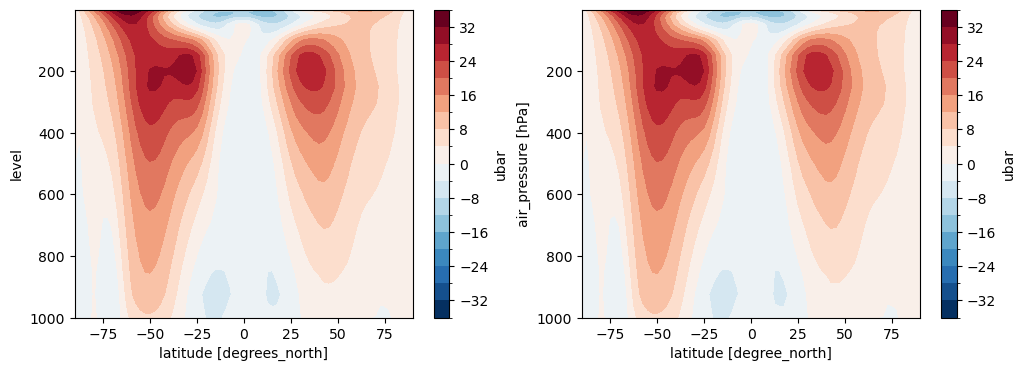

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))

jra.ubar.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False) 

srip.ubar.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False) 

plt.show() 

In [15]:
np.testing.assert_allclose(jra.ubar.values, srip.ubar.values, rtol=1e-02)

AssertionError: 
Not equal to tolerance rtol=0.01, atol=0

Mismatched elements: 215468 / 1137048 (18.9%)
Max absolute difference: 1.1865005
Max relative difference: 6823569.
 x: array([[[-4.214625e-06, -1.752987e+00, -1.398096e+00, ...,
          7.709142e-01,  6.897062e-01, -3.836573e-05],
        [ 3.364864e-05, -1.753006e+00, -1.570999e+00, ...,...
 y: array([[[ 1.203202e-05, -1.849373e+00, -1.520510e+00, ...,
          7.619189e-01,  6.902396e-01,  5.140954e-05],
        [-2.016731e-05, -1.849470e+00, -1.712315e+00, ...,...

In [17]:
np.testing.assert_allclose(jra.div1.values, srip.div1_qg.values, rtol=1e-02)

AssertionError: 
Not equal to tolerance rtol=0.01, atol=0

x and y nan location mismatch:
 x: array([[[-8.942642e+08,  9.561808e-01, -1.541725e+00, ...,
         -1.320236e+00, -2.254537e+00,  1.656786e+10],
        [ 2.031542e+10,  1.031922e+00, -1.324746e+00, ...,...
 y: array([[[          nan,           nan, -1.692972e-05, ...,
         -9.941568e-06,           nan,           nan],
        [          nan,           nan, -1.502400e-05, ...,...

In [24]:
srip.div1_qg.values

array([[[            nan,             nan, -1.69297164e-05, ...,
         -9.94156835e-06,             nan,             nan],
        [            nan,             nan, -1.50239957e-05, ...,
          6.40053395e-06,             nan,             nan],
        [            nan,             nan, -1.40662369e-05, ...,
          1.04802930e-05,             nan,             nan],
        ...,
        [            nan,             nan, -6.94381583e-07, ...,
          8.84022811e-05,             nan,             nan],
        [            nan,             nan, -1.23623374e-06, ...,
          1.15348448e-04,             nan,             nan],
        [            nan,             nan,  2.17187380e-06, ...,
          1.17315700e-04,             nan,             nan]],

       [[            nan,             nan, -3.05103313e-05, ...,
          6.08139590e-06,             nan,             nan],
        [            nan,             nan, -2.44950625e-05, ...,
          2.36082651e-05,             

In [20]:
jra.div1.values 

array([[[-8.94264172e+08,  9.56180837e-01, -1.54172457e+00, ...,
         -1.32023552e+00, -2.25453724e+00,  1.65678633e+10],
        [ 2.03154223e+10,  1.03192224e+00, -1.32474557e+00, ...,
          3.92354180e-01,  4.36022968e-01, -2.68536678e+11],
        [ 2.13178033e+11,  9.50940705e-01, -1.43526008e+00, ...,
          6.30745256e-01,  3.48094197e-01,  3.62977260e+10],
        ...,
        [ 1.63577047e+11,  1.67934846e-02, -5.41482212e-02, ...,
          5.83096094e+00,  1.33894270e+00,  1.99265811e+12],
        [-2.71895805e+11, -3.62978849e-02, -1.13743187e-02, ...,
          8.08187055e+00,  6.70684526e+00,  2.20355699e+12],
        [ 2.54108665e+11,  3.10936745e-02,  2.25200290e-02, ...,
          1.07417236e+01,  8.65793304e+00, -1.66651197e+12]],

       [[-8.03312407e+10,  1.05876814e+00, -2.89145241e+00, ...,
          3.78756901e-01,  8.85869750e-02,  1.02417118e+10],
        [-1.05087802e+11,  1.17363891e+00, -2.46825987e+00, ...,
          1.79799988e+00,  1.18888240e

In [40]:
jra = jra.sel(level=slice(1000., 100.))
srip = srip.sel(level=slice(1000., 100.))

jra = jra.sel(lat=slice(-85, 85))
srip = srip.sel(lat=slice(-85, 85))

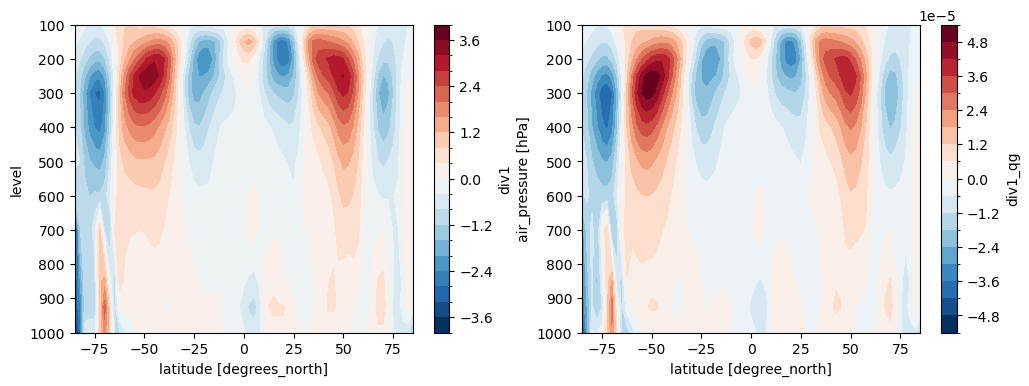

In [41]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))

jra.div1.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False) 

srip.div1_qg.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False) 

plt.show() 

In [42]:
jra.div1 # [m/s/day]

srip.div1_qg # [m s-2]

<xarray.DataArray 'div1_qg' (time: 708, level: 12, lat: 69)>
dask.array<getitem, shape=(708, 12, 69), dtype=float32, chunksize=(31, 12, 69), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 250.0 200.0 150.0 100.0
  * lat      (lat) float32 -85.0 -82.5 -80.0 -77.5 -75.0 ... 77.5 80.0 82.5 85.0
Attributes:
    standard_name:  tendency_of_eastward_wind_due_to_eliassen_palm_flux_diver...
    units:          m s-2
    description:    Uses QG equation
    wavenumber:     
    cell_methods:   time: mean

m/s/day --> m/s/s
- $60 \times 60 \times 24 = 86400$

In [43]:
div1 = jra.div1 / 86400

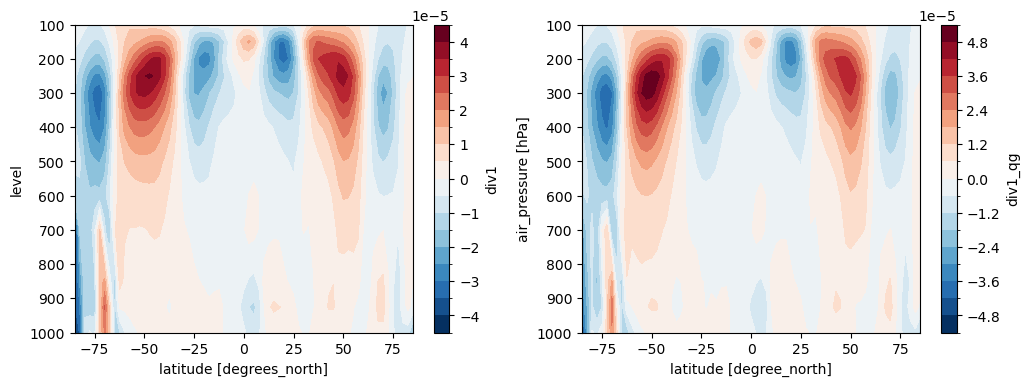

In [44]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))

div1.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False) 

srip.div1_qg.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False) 

plt.show() 

In [47]:
np.testing.assert_allclose(div1.values, srip.div1_qg.values, rtol=1e-0)

AssertionError: 
Not equal to tolerance rtol=1, atol=0

Mismatched elements: 37578 / 586224 (6.41%)
Max absolute difference: 4.44651132e-05
Max relative difference: 66004.73052294
 x: array([[[-1.784403e-05, -1.275568e-05, -2.342223e-06, ...,
         -8.931108e-06, -5.858809e-06, -1.528050e-05],
        [-1.533270e-05, -1.209831e-05, -2.633123e-06, ...,...
 y: array([[[-1.692972e-05, -1.128232e-05,  2.089565e-07, ...,
         -9.430441e-06, -8.172243e-06, -9.941568e-06],
        [-1.502400e-05, -1.029537e-05, -5.259906e-08, ...,...